In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data_set = pd.read_excel("default of credit card clients.xls",header = 1)


In [3]:
data_set

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [4]:
data =  data_set.drop(['default payment next month','ID'], axis = 1)

In [5]:
target = data_set['default payment next month']

In [6]:
correlation = data_set.corr('pearson')

In [7]:
correlation

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


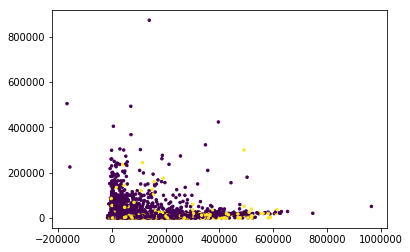

In [8]:
plt.scatter(data['BILL_AMT1'], data['PAY_AMT1'], c=target, marker = '.',s=25)

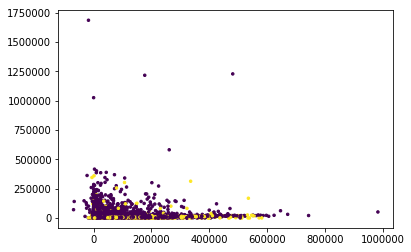

In [9]:
plt.scatter(data['BILL_AMT2'], data['PAY_AMT2'], c=target, marker = '.',s=25)

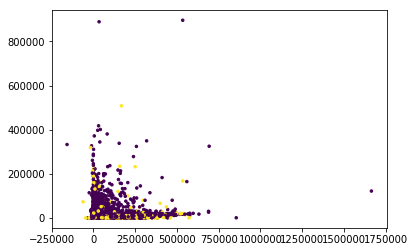

In [10]:
plt.scatter(data['BILL_AMT3'], data['PAY_AMT3'], c=target, marker = '.',s=25)

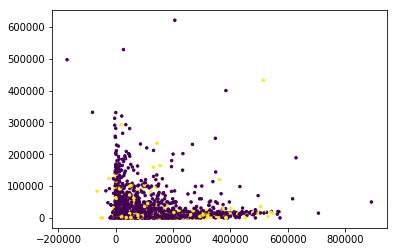

In [11]:
plt.scatter(data['BILL_AMT4'], data['PAY_AMT4'], c=target, marker = '.',s=25)

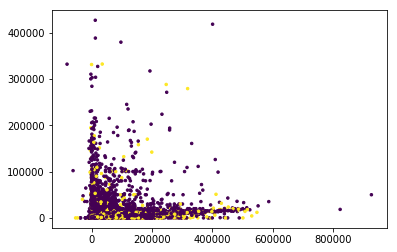

In [12]:
plt.scatter(data['BILL_AMT5'], data['PAY_AMT5'], c=target, marker = '.',s=25)

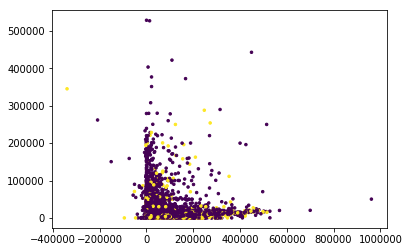

In [13]:
plt.scatter(data['BILL_AMT6'], data['PAY_AMT6'], c=target, marker = '.',s=25)

In [14]:
x1 = np.array(data['LIMIT_BAL'])
x2 = np.array(data['SEX'])
x3 = np.array(data['EDUCATION'])
x4 = np.array(data['MARRIAGE'])
x5 = np.array(data['AGE'])
x6 = np.array(data['PAY_0'])
x7 = np.array(data['BILL_AMT1'])
x8 = np.array(data['PAY_AMT1'])
y = np.array(target)

In [15]:
x1 = (x1-x1.min())/(x1.max()-x1.min())
x2 = (x2-x2.min())/(x2.max()-x2.min())
x3 = (x3-x3.min())/(x3.max()-x3.min())
x4 = (x4-x4.min())/(x4.max()-x4.min())
x5 = (x5-x5.min())/(x5.max()-x5.min())
x6 = (x6-x6.min())/(x6.max()-x6.min())
x7 = (x7-x7.min())/(x7.max()-x7.min())
x8 = (x8-x8.min())/(x8.max()-x8.min())



In [16]:
xt1, xs1, xt2,xs2,xt3,xs3,xt4,xs4,xt5,xs5,xt6,xs6,xt7,xs7,xt8,xs8, yt, ys = train_test_split(x1,x2,x3,x4,x5,x6,x7,x8,y,test_size =0.5)

In [17]:
xs2.shape

(15000,)

In [18]:
def hypo(a,b,c,d,e,f,g,h,q,x1,x2,x3,x4,x5,x6,x7,x8):
#     print(1/(1+np.exp(-((a*x1) +(b*x2) + (c*x3)+ (d*x4)+ (e*x5)+ (f*x6)+ (g*x7)+ (h*x8) + i))))
    return 1/(1+np.exp(-((a*x1) +(b*x2) + (c*x3)+ (d*x4)+ (e*x5)+ (f*x6)+ (g*x7)+ (h*x8) + q)))

In [19]:
def error(a,b,c,d,e,f,g,h,q,x1,x2,x3,x4,x5,x6,x7,x8,y):
    e1 = 0 
    m = len(x1)
    
    for i in range(m):
        e1 += (-(y[i]*np.log(hypo(a,b,c,d,e,f,g,h,q,x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i]))) - ((1-y[i]) * np.log(1-hypo(a,b,c,d,e,f,g,h,q,x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i]))))
    
    return (1/m) * e1

In [20]:
def step_gradient(a,b,c,d,e,f,g,h,q,x1,x2,x3,x4,x5,x6,x7,x8, y, learning_rate):
    grad_a = 0 
    grad_b = 0
    grad_c = 0
    grad_d = 0
    grad_e = 0
    grad_f = 0
    grad_g = 0
    grad_h = 0
    grad_q = 0
    
    m = len(x1)
    
    for i in range(m):
        grad_a += (hypo(a,b,c,d,e,f,g,h,q,x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i]) - y[i]) * x1[i]
        grad_b +=  (hypo(a,b,c,d,e,f,g,h,q,x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i]) - y[i]) * x2[i]
        grad_c +=  (hypo(a,b,c,d,e,f,g,h,q,x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i]) - y[i]) * x3[i]
        grad_d += (hypo(a,b,c,d,e,f,g,h,q,x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i]) - y[i]) * x4[i]
        grad_e +=  (hypo(a,b,c,d,e,f,g,h,q,x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i]) - y[i]) * x5[i]
        grad_f +=  (hypo(a,b,c,d,e,f,g,h,q,x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i]) - y[i]) * x6[i] 
        grad_g += (hypo(a,b,c,d,e,f,g,h,q,x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i]) - y[i]) * x7[i]
        grad_h += (hypo(a,b,c,d,e,f,g,h,q,x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i]) - y[i]) * x8[i]
        grad_q += (hypo(a,b,c,d,e,f,g,h,q,x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i]) - y[i])
        
    a= a - grad_a * learning_rate
    b= b - grad_b * learning_rate
    c= c - grad_c * learning_rate
    d= d - grad_d * learning_rate
    e= e - grad_e * learning_rate
    f= f - grad_f * learning_rate
    g= g - grad_g * learning_rate
    h = h- grad_h * learning_rate
    q = q - grad_q * learning_rate
    
    return a,b,c,d,e,f,g,h,q

In [21]:
def descend(init_a,init_b,init_c,init_d,init_e,init_f,init_g,init_h,init_q,x1,x2,x3,x4,x5,x6,x7,x8,y,learning_rate,iterations):
    a = init_a
    b = init_b
    c = init_c
    d = init_d
    e = init_e
    f = init_f
    g = init_g
    h = init_h
    q = init_q
    
    for i in  range(iterations):
        e1 = error(a,b,c,d,e,f,g,h,q,x1,x2,x3,x4,x5,x6,x7,x8,y)
        if i%1000 == 0:
            print(f"error: {e1}, a:{a}, b: {b}, c: {c}, d: {d}, e: {e}, f: {f}, g: {g}, h: {h}, q: {q}")
        a,b,c,d,e,f,g,h,q= step_gradient(a,b,c,d,e,f,g,h,q,x1,x2,x3,x4,x5,x6,x7,x8, y, learning_rate)
    return a,b,c,d,e,f,g,h,q

In [22]:
final_a = 0
final_b = 0
final_c = 0
final_d = 0
final_e = 0
final_f = 0
final_g = 0
final_h = 0
final_q = 0
iterations =1000
learning_rate = 0.001

In [23]:
final_a ,  final_b, final_c, final_d, final_e, final_f, final_g, final_h, final_q = descend(final_a ,  final_b, final_c, final_d, final_e, final_f, final_g, final_h, final_q,xt1,xt2,xt3,xt4,xt5,xt6,xt7,xt8,yt,learning_rate,iterations)

error: 0.6931471805600756, a:0, b: 0, c: 0, d: 0, e: 0, f: 0, g: 0, h: 0, q: 0


KeyboardInterrupt: 

In [ ]:
def accuracy(a,x,b,y):
    correct = 0
    m = len(x)
    
    for i in range(m):
        pred = hypo(a,x[i],b)
        if pred > 0.5:
            z = 1
        else:
            z = 0
        
        if y[i] == z:
            correct +=1
    print(f"accuracy: {correct/len(y)}")

In [ ]:
np.exp(-1)